In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
mydata = pd.read_csv('5_stocks_2000_2017.csv', index_col = 'Date')

In [6]:
mydata.tail()

,BP,F,XOM,LNC,AAPL
Date,,,,,
2017-12-06,39.580002,12.3800,82.279999,76.500000,169.009995
2017-12-07,39.310001,12.5300,82.550003,77.589996,169.320007
2017-12-08,39.639999,12.6100,82.660004,78.540001,169.369995
2017-12-11,39.930000,12.5800,83.029999,77.169998,172.669998
2017-12-12,40.709999,12.5242,83.313904,77.559998,172.059998


### We need to normalize to 100 (p1/p0) * 100

In [7]:
mydata.iloc[0] #to call a row

BP      26.942526
F       17.911160
XOM     25.595554
LNC     27.138775
AAPL     3.291592
Name: 1999-12-31, dtype: float64

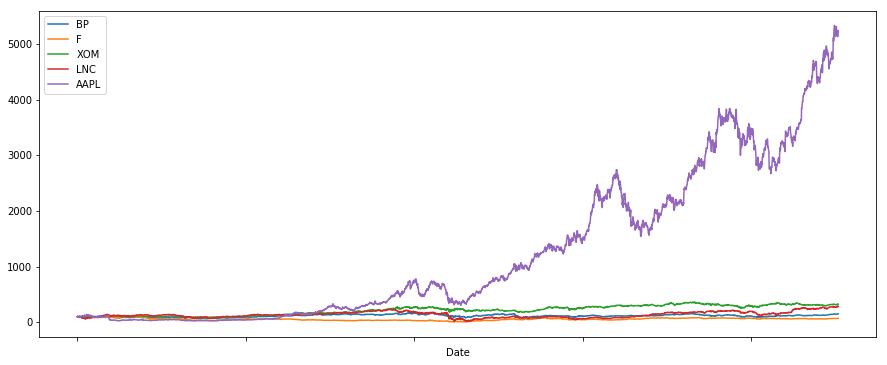

In [9]:
(mydata/mydata.iloc[0] * 100).plot(figsize=(15,6))
plt.show() # normalizing to compare their rates of return

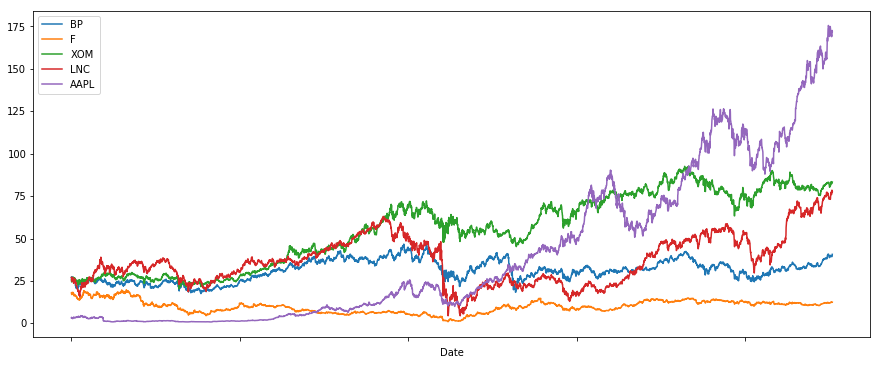

In [10]:
mydata.plot(figsize=(15,6))
plt.show()

## Calulating Returns for the Portfolio

In [11]:
returns = (mydata/mydata.shift(1)) - 1 #using formula to create a new table of just daily returns 
returns.head()

,BP,F,XOM,LNC,AAPL
Date,,,,,
1999-12-31,NaN,NaN,NaN,NaN,NaN
2000-01-03,-0.008430,-0.017585,-0.027929,-0.023438,0.088754
2000-01-04,-0.005314,-0.033413,-0.019154,-0.028800,-0.084310
2000-01-05,0.034188,0.003704,0.054515,-0.034596,0.014634
2000-01-06,0.002066,0.001230,0.051697,0.018302,-0.086538


In [12]:
weights = np.array([0.20,0.20,0.20,0.20,0.20])

In [13]:
#using dot function to do multiplication across the array
np.dot(returns , weights)

array([        nan,  0.00227443, -0.03419821, ...,  0.00573022,
        0.0022907 ,  0.00400778])

In [14]:
annual_returns = returns.mean() * 250

In [15]:
annual_returns

BP      0.062602
F       0.070093
XOM     0.094579
LNC     0.198599
AAPL    0.309165
dtype: float64

In [16]:
np.dot(annual_returns, weights) #should return one number

0.14700757535575665

In [17]:
port1 = str(round(np.dot(annual_returns, weights) ,5) *100) + ' %'

In [18]:
print(port1)

14.701 %


In [19]:
weights_2 = np.array([0.30, 0.25, 0.10, 0.15, 0.20])

In [20]:
port_2 = str(round(np.dot(annual_returns, weights_2), 5)*100) + ' %'

In [21]:
print(port1, port_2)

14.701 % 13.738 %
